<h2>Sales Analysis Project</h2>

**Imported necessary libraries**

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #used for vizulizing data
%matplotlib inline 
import seaborn as sns


In [13]:
#importing csv file
df = pd.read_csv('C:\\Users\\rm217\\Downloads\\Diwali Sales Data.csv', encoding= 'unicode_escape')

In [15]:
df.shape

(11251, 15)

In [19]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [23]:
# As we have two columns blank so let's drop them
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [25]:
#check for null values in data
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [29]:
# we noticed 12 null valuess in Amount columns so let's drop them
df.dropna(inplace = True)

In [32]:
# Changed data type of Amount column from float to int
df['Amount'] = df['Amount'].astype('int')

In [35]:
df['Amount'].dtypes

dtype('int32')

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [45]:
#renamed the column Occupation to Profession
df.rename(columns = {'Occupation': 'Profession'}) # we didn't change it for permanent

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Profession,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [47]:
# Used describe() method to return description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [49]:
# used describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

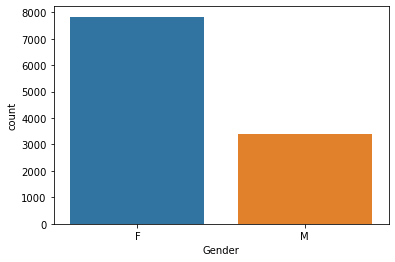

In [50]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender', data = df)

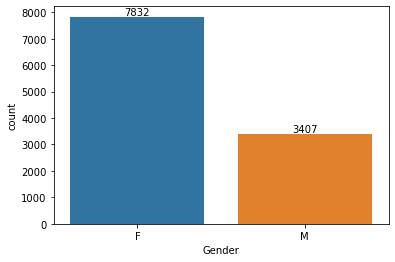

In [51]:
# Added data label in bar chart

ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

From the above chart we can see that most of the orders are placed by female 

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

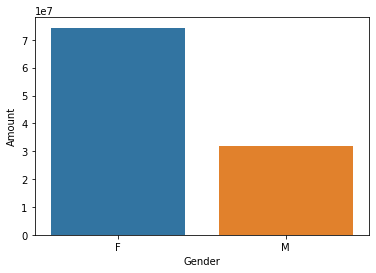

In [54]:
# plotting a bar chart for gender vs total amount

sales_gen =  df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(['Amount'], ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

*From the above charts we can say that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

<AxesSubplot:xlabel='Age Group', ylabel='count'>

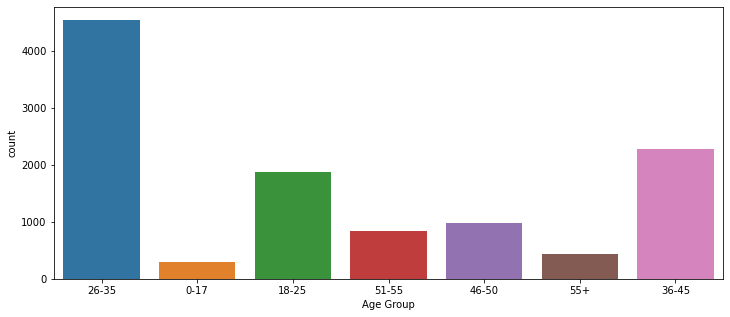

In [70]:
# Giving figure size to chart
plt.figure(figsize = (12, 5))

sns.countplot(data = df, x = 'Age Group')

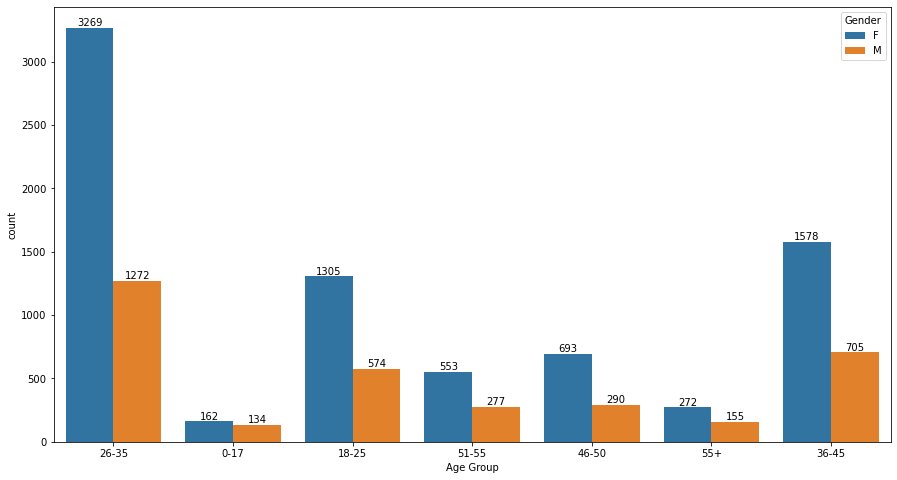

In [63]:
plt.figure(figsize = (15,8))

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender') 

for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

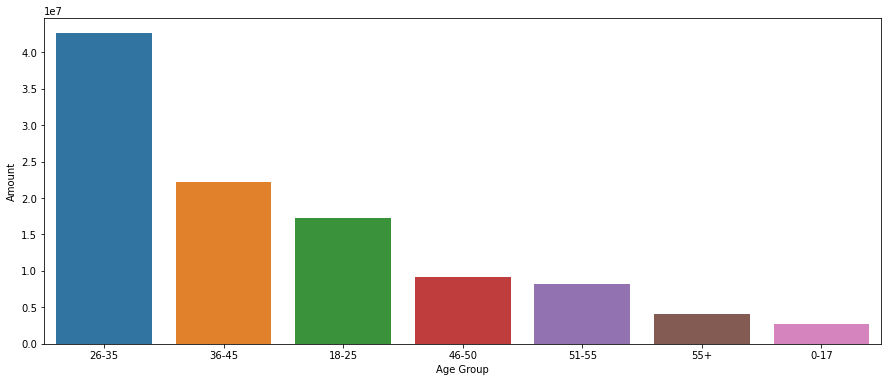

In [67]:
# Total Amount vs Age Group

plt.figure(figsize = (15,6))

sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(['Amount'], ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs*

### State

<AxesSubplot:xlabel='State', ylabel='Orders'>

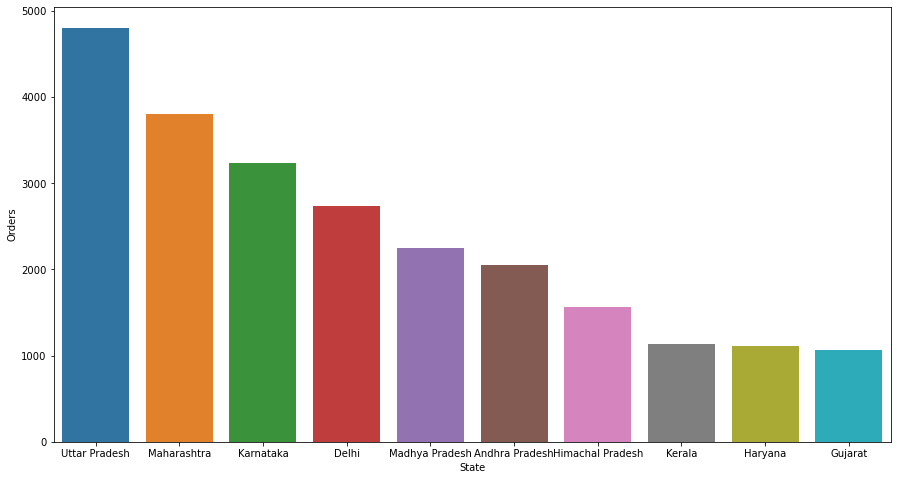

In [75]:
# Top 10 states with highest number of orders

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(['Orders'], ascending = False).head(10)

plt.figure(figsize = (15,8))
sns.barplot(x = 'State', y = 'Orders', data = sales_state)

From the above graph we can see that most of the orders were placed from Uttar Pradesh, Maharashtra and Karnataka

<AxesSubplot:xlabel='State', ylabel='Amount'>

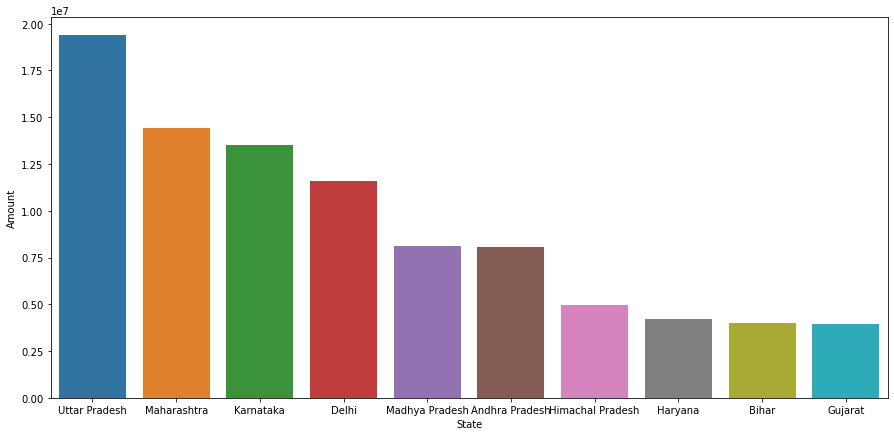

In [80]:
# total amount/sales from top 10 states
Amt_sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(['Amount'], ascending = False).head(10)

plt.figure(figsize = (15, 7))
sns.barplot(x = 'State', y = 'Amount', data = Amt_sales_state)

*From the above graph we can see that most of the sales came from ttar Pradesh, Maharashtra and Karnataka*

### Marital Status

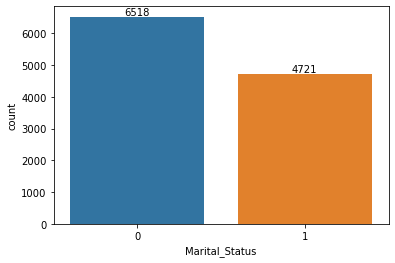

<Figure size 504x360 with 0 Axes>

In [88]:
ax = sns.countplot(data = df, x = 'Marital_Status')

plt.figure(figsize = (7,5))
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

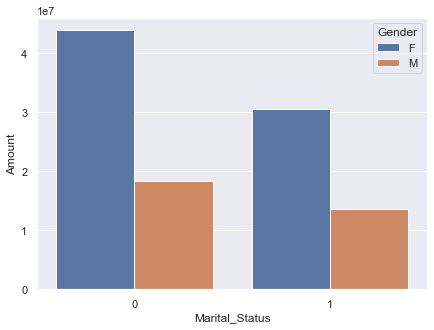

In [91]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(['Amount'], ascending = False)

plt.figure(figsize = (7,5))
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue = 'Gender' )

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

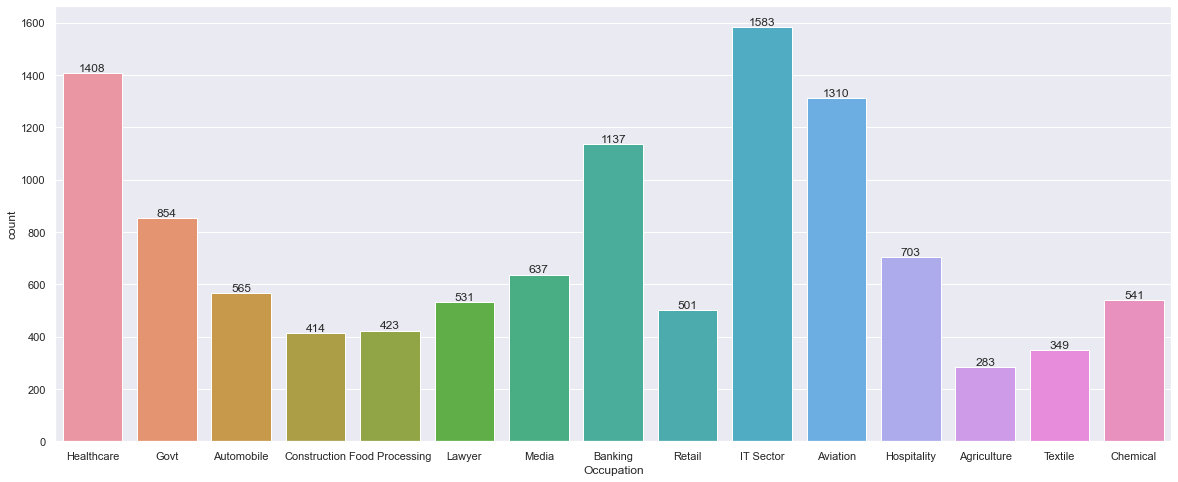

In [96]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'Occupation', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

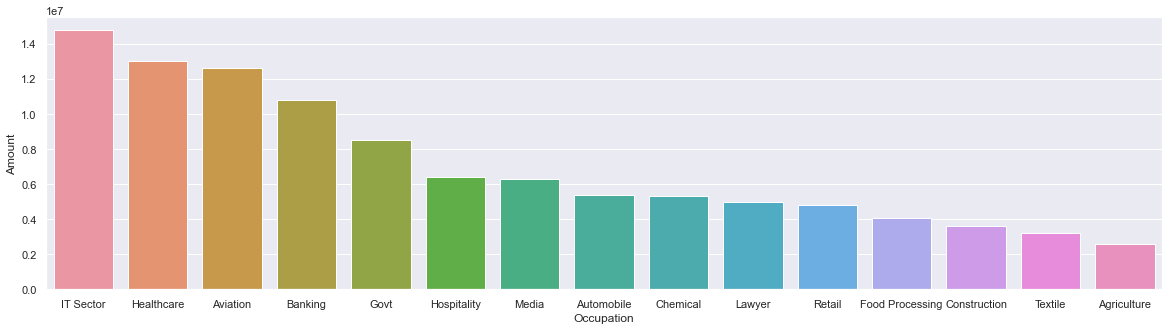

In [97]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(['Amount'], ascending = False)

sns.barplot(x = 'Occupation', y = 'Amount', data = sales_state)

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

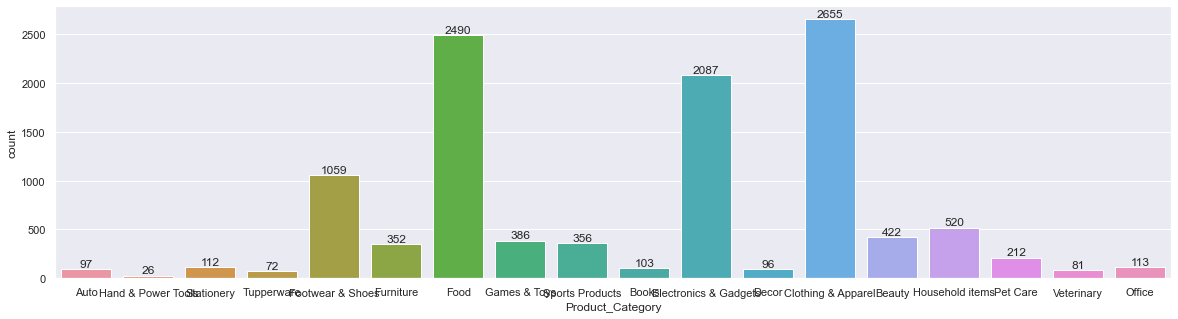

In [102]:
ax = sns.countplot(x = 'Product_Category', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

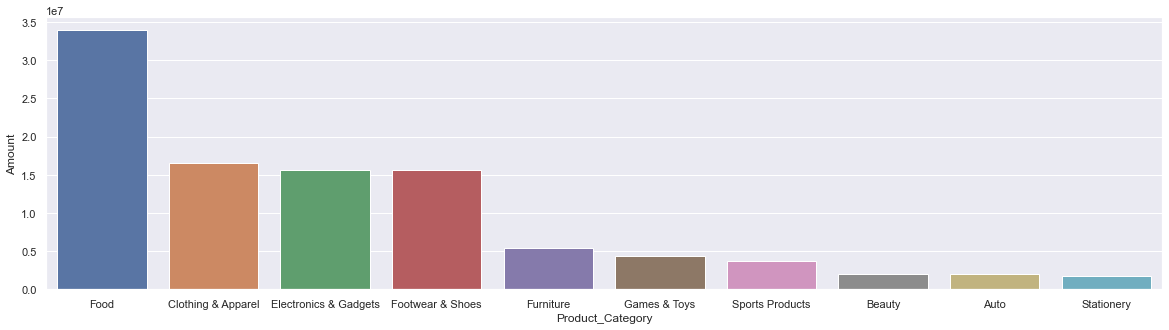

In [103]:
sales_product = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(['Amount'], ascending = False).head(10)

sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_product)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<AxesSubplot:xlabel='Product_ID'>

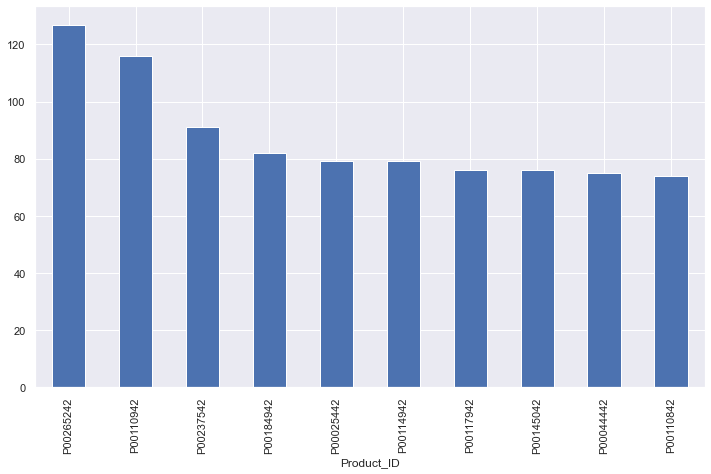

In [104]:
# top 10 most sold products

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Final Conclusion:

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*